In [63]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [64]:
!mkdir aadhar_card_tampering
!mkdir aadhar_card_tampering\image

A subdirectory or file aadhar_card_tampering already exists.
A subdirectory or file aadhar_card_tampering\image already exists.


In [65]:
original=Image.open(requests.get('https://assets1.cleartax-cdn.com/finfo/wg-utils/retool/0b6b2e22-77af-4bc5-8517-738c7b010f61.PNG', stream=True).raw )
tampered=Image.open(requests.get('https://images.ctfassets.net/uwf0n1j71a7j/239NiPcjXw5XkopbDl84Rk/692a7df221f8bf99676c3a3797199e40/aadhaar-card-for-nri.png?fm=webp&w=800&q=75', stream=True).raw)


In [66]:
print('Original image format : ',original.format)
print('Tampered image format : ',tampered.format)
print('Original image format : ',original.size)
print('Tampered image format : ',original.size) 

Original image format :  PNG
Tampered image format :  WEBP
Original image format :  (328, 220)
Tampered image format :  (328, 220)


In [67]:
original = original.resize((250,160))
print(original.size)
original.save('aadhar_card_tampering/image/original.png') #Save Image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('aadhar_card_tampering/image/tampered.png') #Save Image

(250, 160)
(250, 160)


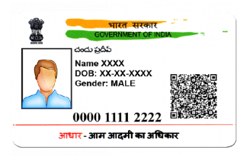

In [68]:
original

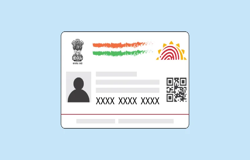

In [69]:
tampered

In [70]:
original = cv2.imread('aadhar_card_tampering/image/original.png')
tampered = cv2.imread('aadhar_card_tampering/image/tampered.png')

In [71]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [72]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.39044059508973306


In [73]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [74]:
for c in cnts:
	#applying contours on image
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(original, (x,y), (x+w,y+h), (0, 0, 225), 2)
	cv2.rectangle(tampered, (x,y), (x+w,y+h), (0, 0, 225), 2)


Original Format Image


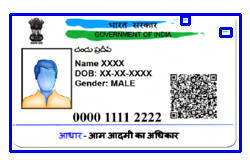

In [75]:
print('Original Format Image')
Image.fromarray(original)

Tampered Format Image


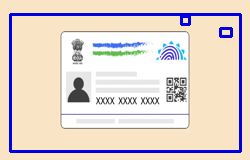

In [76]:
print('Tampered Format Image')
Image.fromarray(tampered)

Different Image


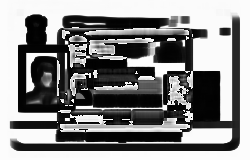

In [77]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


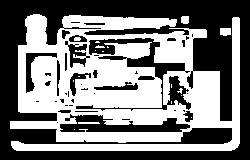

In [78]:
print('Threshold Image')
Image.fromarray(thresh)